# LUT Verificaton

In [1]:
import os 
import sys
import matplotlib.pyplot as plt
import ConvergenceLibrary 
from ConvergenceLibrary import RandomSamples, PRGrid, SU2_InterpolatedData, SciPy_InterpolatedData, RefinementLevel
reload(ConvergenceLibrary)
from shutil import copyfile
%matplotlib inline
#%matplotlib notebook

## Select which LUT file to use and load samples

In [2]:
PR_files = os.listdir('TableLibrary')
levels = len(PR_files);
cases = ["rhoe","PT", "Prho","rhoT","Ps","hs"]
Refinement_Levels = [RefinementLevel(PR_files[i], cases) for i in range(levels)]

Random_Samples = RandomSamples('random.dat')

Loading random verification data
DONE Loading random verification data
Preparing input files...
DONE Preparing input files...


# Run the verification for each refinement level

In [3]:

for level in Refinement_Levels:
    output_files = ["rhoe_out.dat","PT_out.dat", "Prho_out.dat","rhoT_out.dat","Ps_out.dat","hs_out.dat"]
    for f in output_files:
        try:
             os.remove(f)
        except OSError:
             pass

    #Use the thermotable related to the desired refinement level
    copyfile('TableLibrary/'+level.filename, 'CO2.rgp')  
    print 'Mesh file:',  level.filename;
    #Recompile if necessary
    os.system('make Debug/makefile');
    print 'Running...'
    #Run and save the log
    os.system('Debug/TableReader>log');
    print 'DONE'
    level.load_mesh();
    level.load_random_samples(Random_Samples)
    level.load_results_SU2();
    level.load_results_SciPy('linear');
    

Mesh file: 2020.rgp
Running...
DONE
P-RHO dimensions: 20 by 20
SciPy Interpolating  rhoe
SciPy Interpolating  PT
SciPy Interpolating  Prho
SciPy Interpolating  rhoT
SciPy Interpolating  Ps
SciPy Interpolating  hs
Mesh file: 4040.rgp
Running...
DONE
P-RHO dimensions: 40 by 40
SciPy Interpolating  rhoe
SciPy Interpolating  PT
SciPy Interpolating  Prho
SciPy Interpolating  rhoT
SciPy Interpolating  Ps
SciPy Interpolating  hs
Mesh file: 8080.rgp
Running...
DONE
P-RHO dimensions: 80 by 80
SciPy Interpolating  rhoe
SciPy Interpolating  PT
SciPy Interpolating  Prho
SciPy Interpolating  rhoT
SciPy Interpolating  Ps
SciPy Interpolating  hs


# Plot the results 

## RHOE

Error max SU2 0.000298256091593
Error max SciPy 0.0991551966762


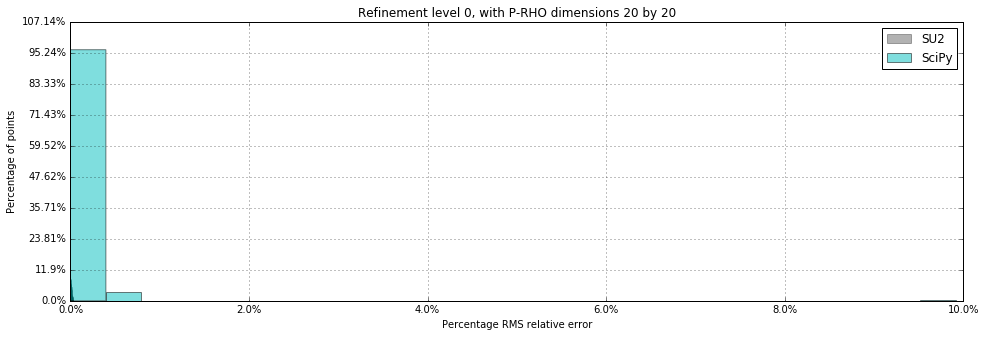

Error max SU2 6.89963063965e-05
Error max SciPy 0.0637069291148


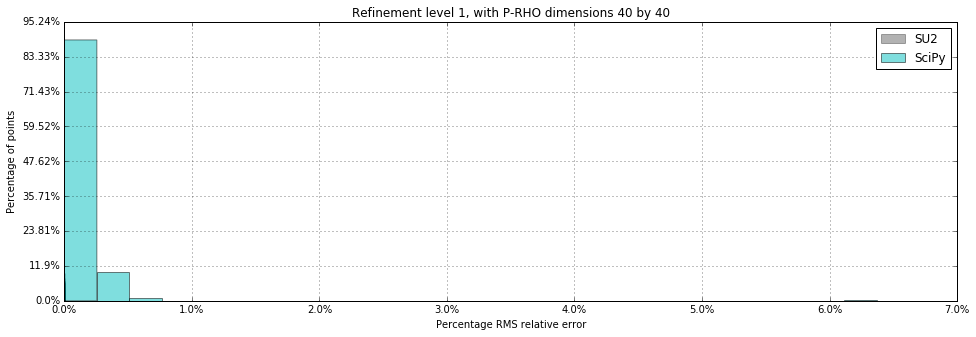

Error max SU2 2.30193319326e-05
Error max SciPy 0.0196619841716


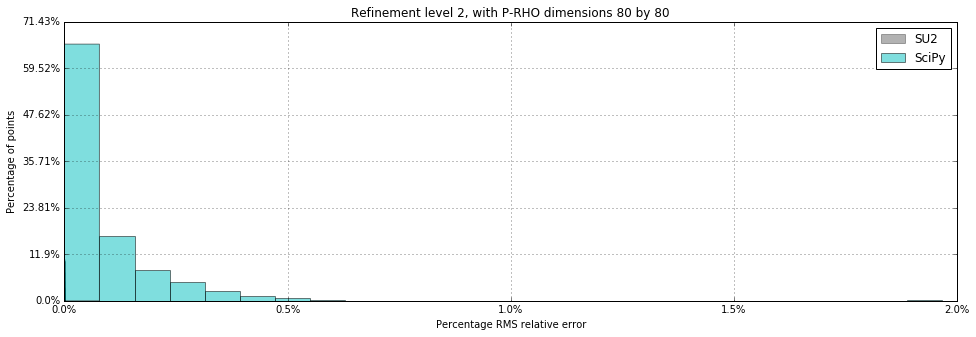

In [4]:
%matplotlib inline
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('rhoe')
    plt.show()


## PRHO

Error max SU2 0.000800170331942
Error max SciPy 0.000885825928348


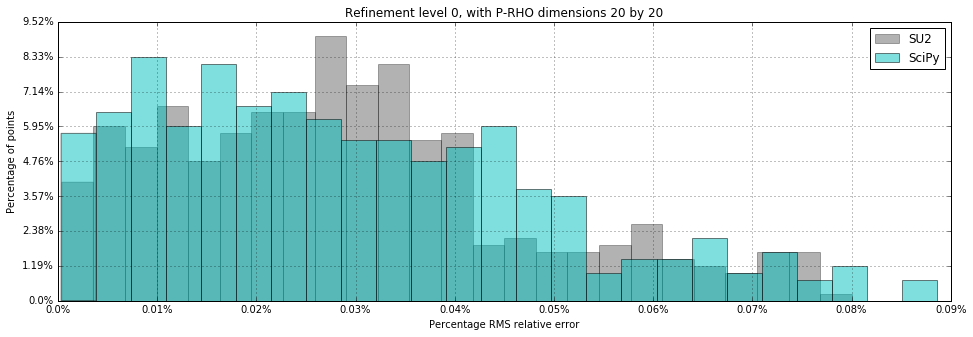

Error max SU2 0.000190633115222
Error max SciPy 0.000216844287862


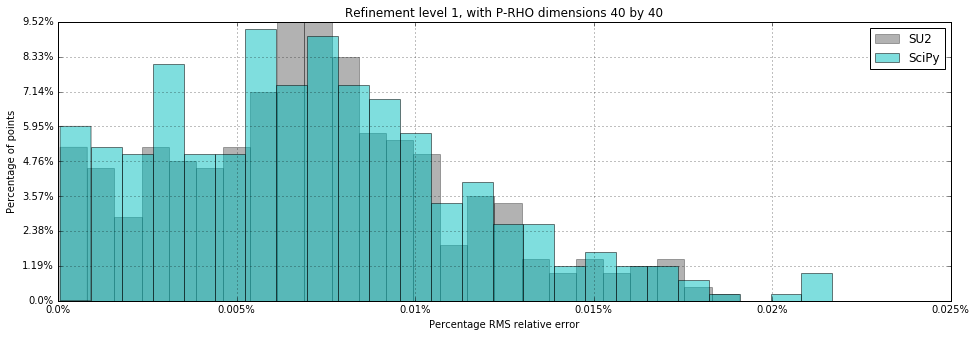

Error max SU2 4.65689264694e-05
Error max SciPy 0.000206436069714


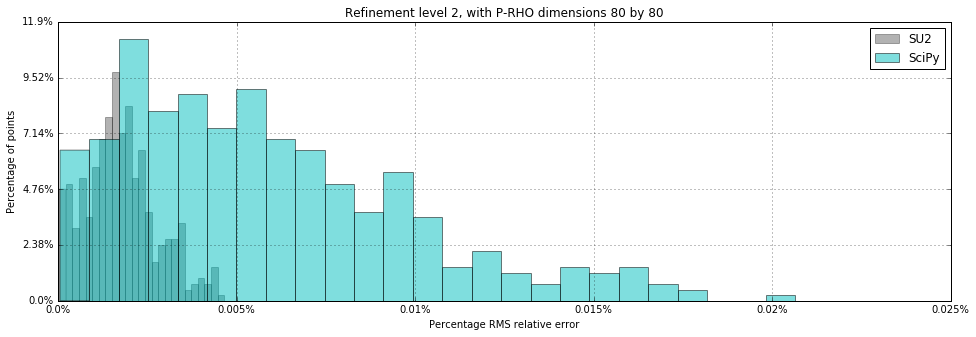

In [5]:
%matplotlib inline
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('Prho')
    plt.show()

## RHOT

Error max SU2 0.000245064949574
Error max SciPy 0.0117367203376


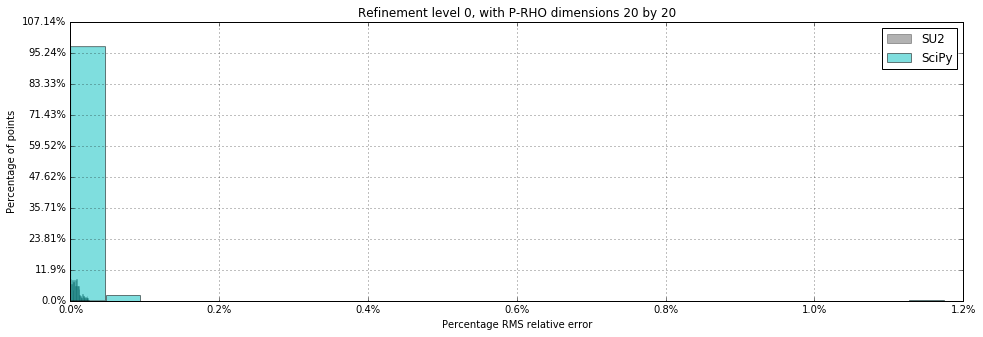

Error max SU2 5.73797804223e-05
Error max SciPy 0.00302316792379


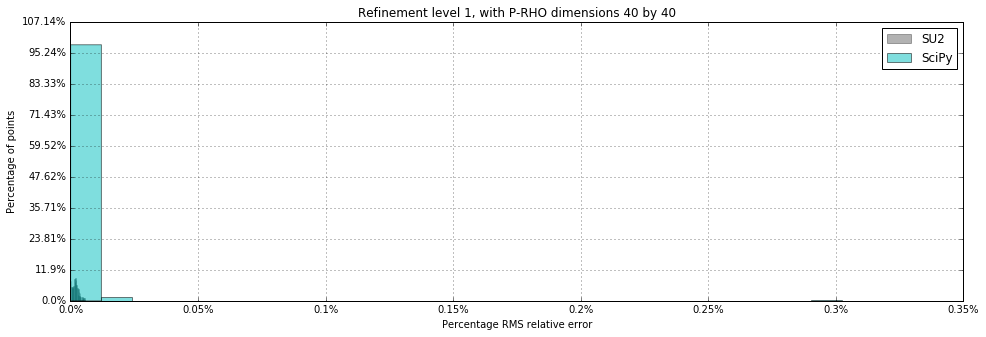

Error max SU2 2.16365823436e-05
Error max SciPy 0.00380251826696


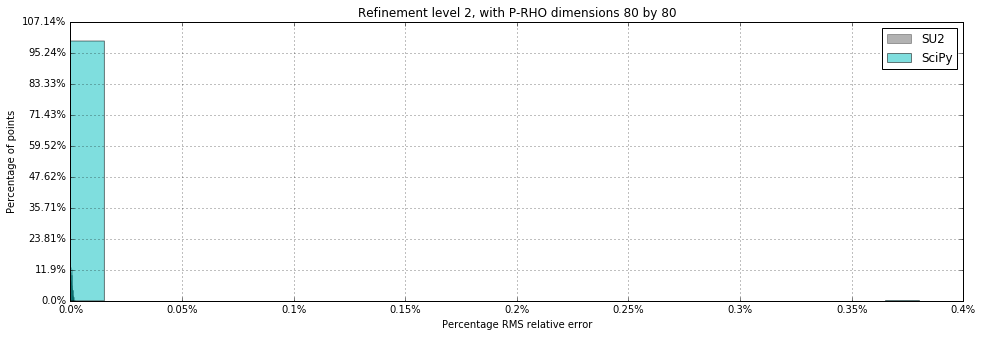

In [6]:
%matplotlib inline
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('rhoT')
    plt.show()

## PS

Error max SU2 0.000443190759491
Error max SciPy 0.000423217516574


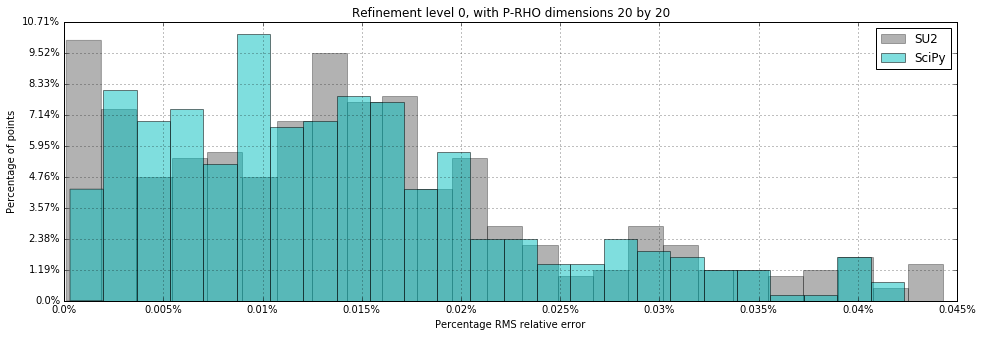

Error max SU2 0.000102544302758
Error max SciPy 9.75469099803e-05


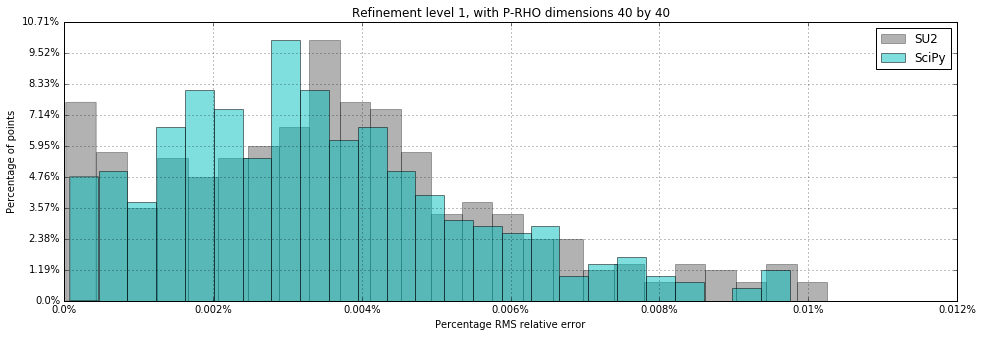

Error max SU2 2.59945834188e-05
Error max SciPy 2.59048374314e-05


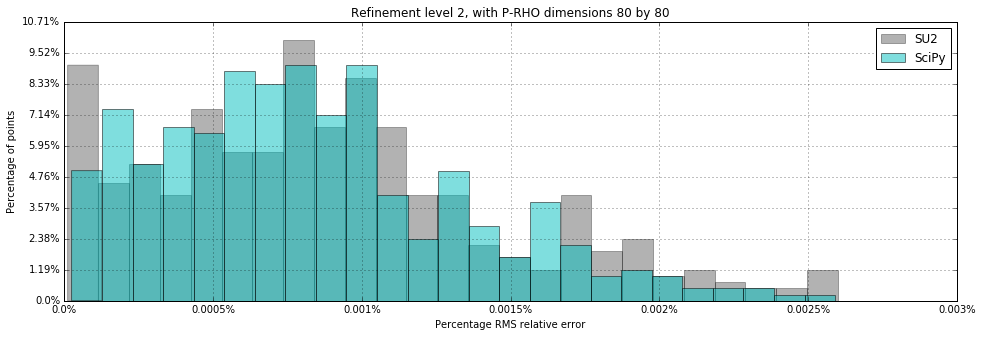

In [7]:
%matplotlib inline
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('Ps')
    plt.show()

## HS

Error max SU2 0.0129932806884
Error max SciPy 0.116050354511


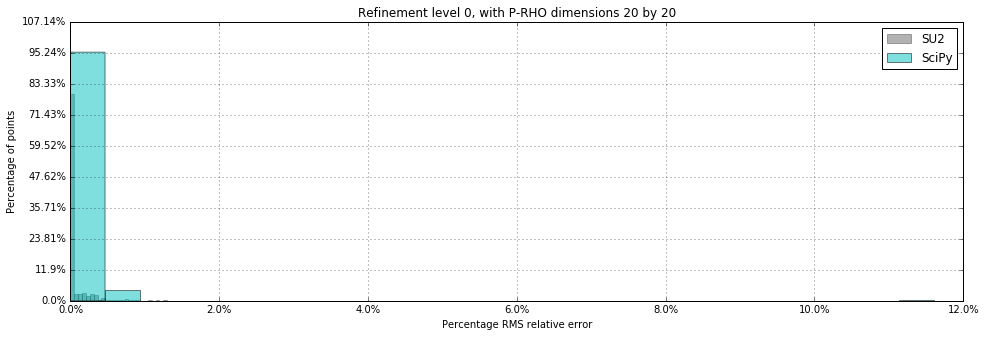

Error max SU2 0.00269874798953
Error max SciPy 0.0743362530977


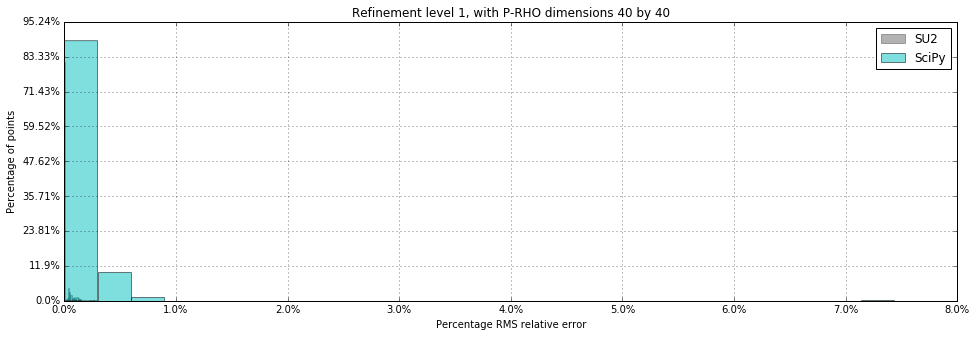

Error max SU2 0.0006089511433
Error max SciPy 0.0228403584687


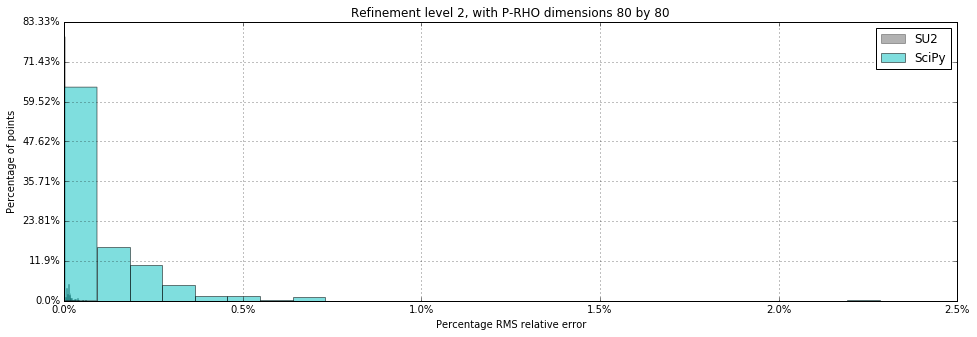

In [8]:
%matplotlib inline
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('hs')
    plt.show()